In [1]:
# importing necessary liberaries 

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Read the csv file using pandas
bike_file = pd.read_csv('day.csv')

In [3]:
# getting the head of the data
bike_file.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Getting the shape of the data 
bike_file.shape

(730, 16)

In [5]:
# Finding the non null data 
bike_file.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### from the above we find that all of the coloums are not null 
 #### we need to find the demand, this demand is basically cnt ( coloumn)

In [6]:
#Describe the file 
bike_file.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### we find that there are 730 rows of data and 16 coloumns these will be used to gather more info
### We find that instant is not a required coloum because its just a number so we will drop it 
### Dteday is also not needed because it is luckily divided into different coloumns such are year month week day and working day 


##### later we found that cnt is the needed coloumn and additionally we can drop casual and registered variables ( this was found after the modle was build )

In [7]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bike_file['days_old'] = (pd.to_datetime(bike_file['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [8]:
bike_file

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114,725
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095,726
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,727
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,728


In [9]:
#check the datatypes of data
bike_file.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
days_old        int64
dtype: object

In [10]:
#Print null counts by column ( NO NULL VALUE FOUND )
bike_file.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
days_old      0
dtype: int64

In [11]:
# droping instant column as it is index column which has nothing to do with target
bike_file.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_file.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_file.drop(['casual'], axis = 1, inplace = True)
bike_file.drop(['registered'], axis = 1, inplace = True)

In [12]:
#renaming the data 

bike_file.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_file.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_file.mnth = bike_file.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_file.weekday = bike_file.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_file.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [13]:
# checking if we have clean data
bike_file

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,moderate,10.420847,11.33210,65.2917,23.458911,2114,725
726,spring,1,dec,0,fri,1,moderate,10.386653,12.75230,59.0000,10.416557,3095,726
727,spring,1,dec,0,sat,0,moderate,10.386653,12.12000,75.2917,8.333661,1341,727
728,spring,1,dec,0,sun,0,good,10.489153,11.58500,48.3333,23.500518,1796,728


In [14]:
# Now lets us start with understanding the data ( EDA )



<AxesSubplot:>

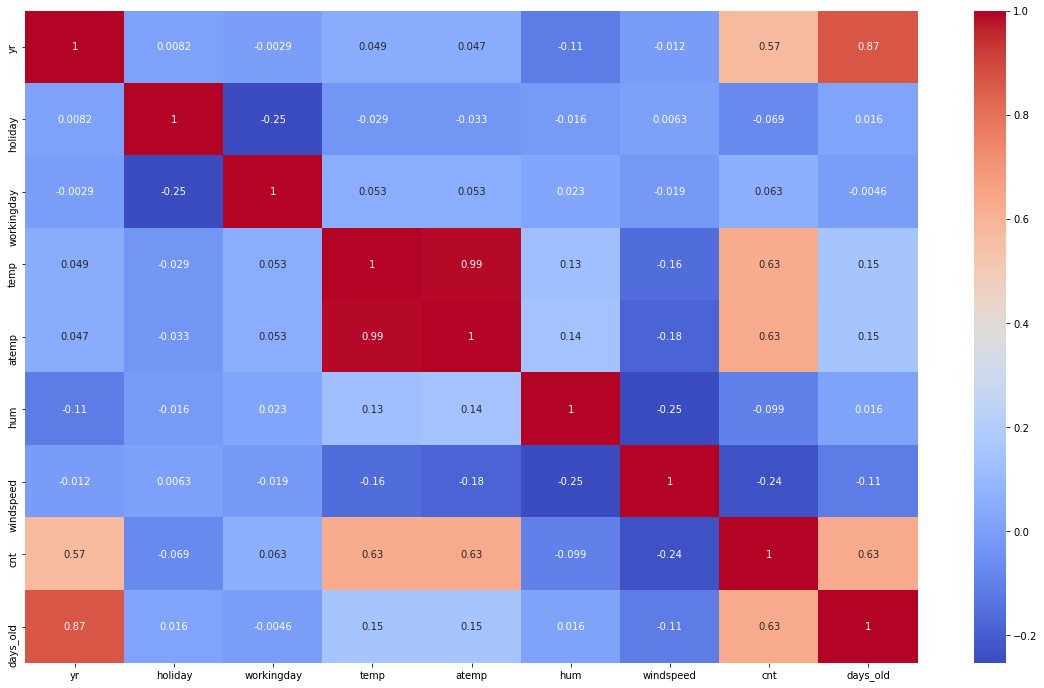

In [15]:
# we have found a correlation graph known as heat map 

from matplotlib.pyplot import figure

figure(figsize=(20, 12))

sns.heatmap(bike_file.corr(), cmap='coolwarm', annot=True)


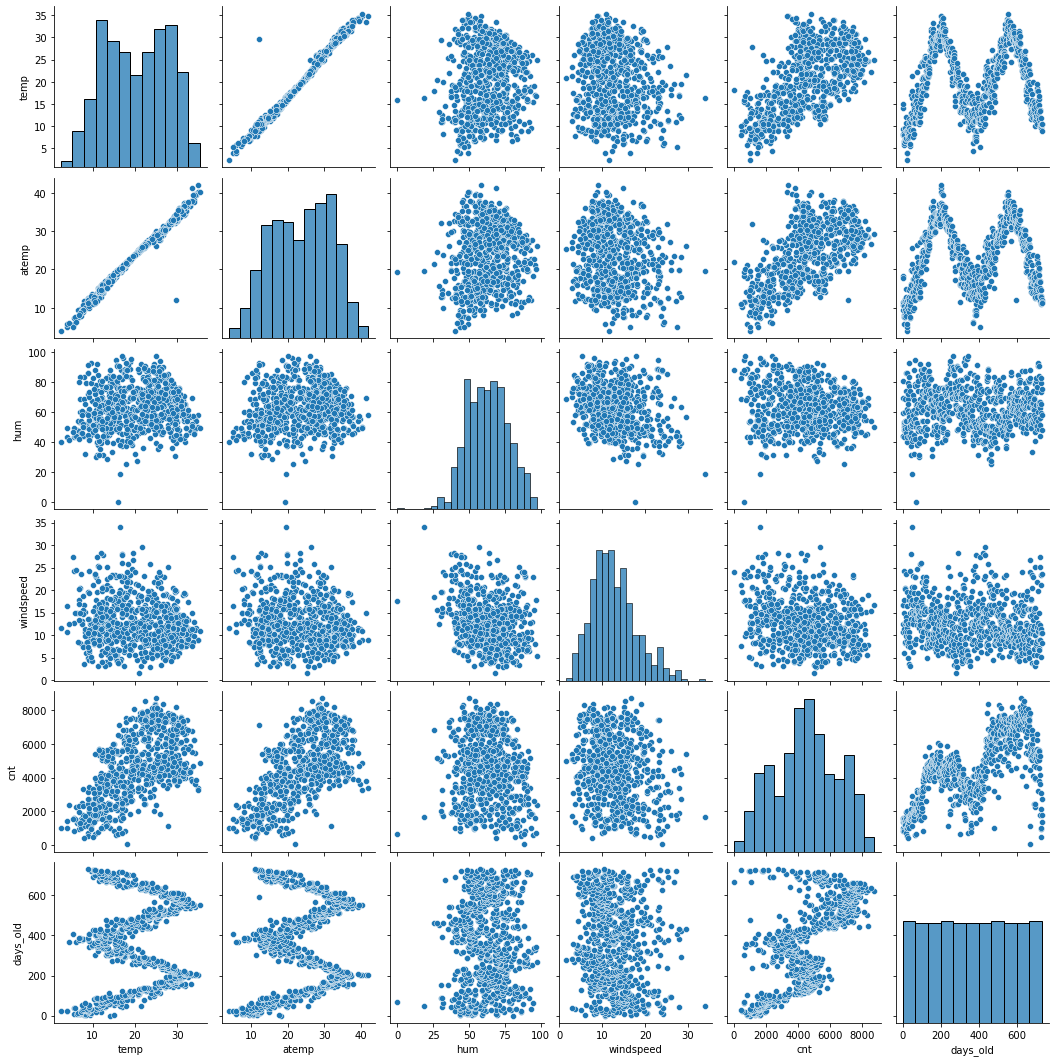

In [16]:
# let us try to get a scattered plot to understand the linearity of the data 
from matplotlib.pyplot import figure

col = ['season','temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old']

sns.pairplot(bike_file[col])


##  temp and atemp has the highest corelation with the target variable cnt
### temp and atemp are highly co-related with each other

<Figure size 1440x1080 with 0 Axes>

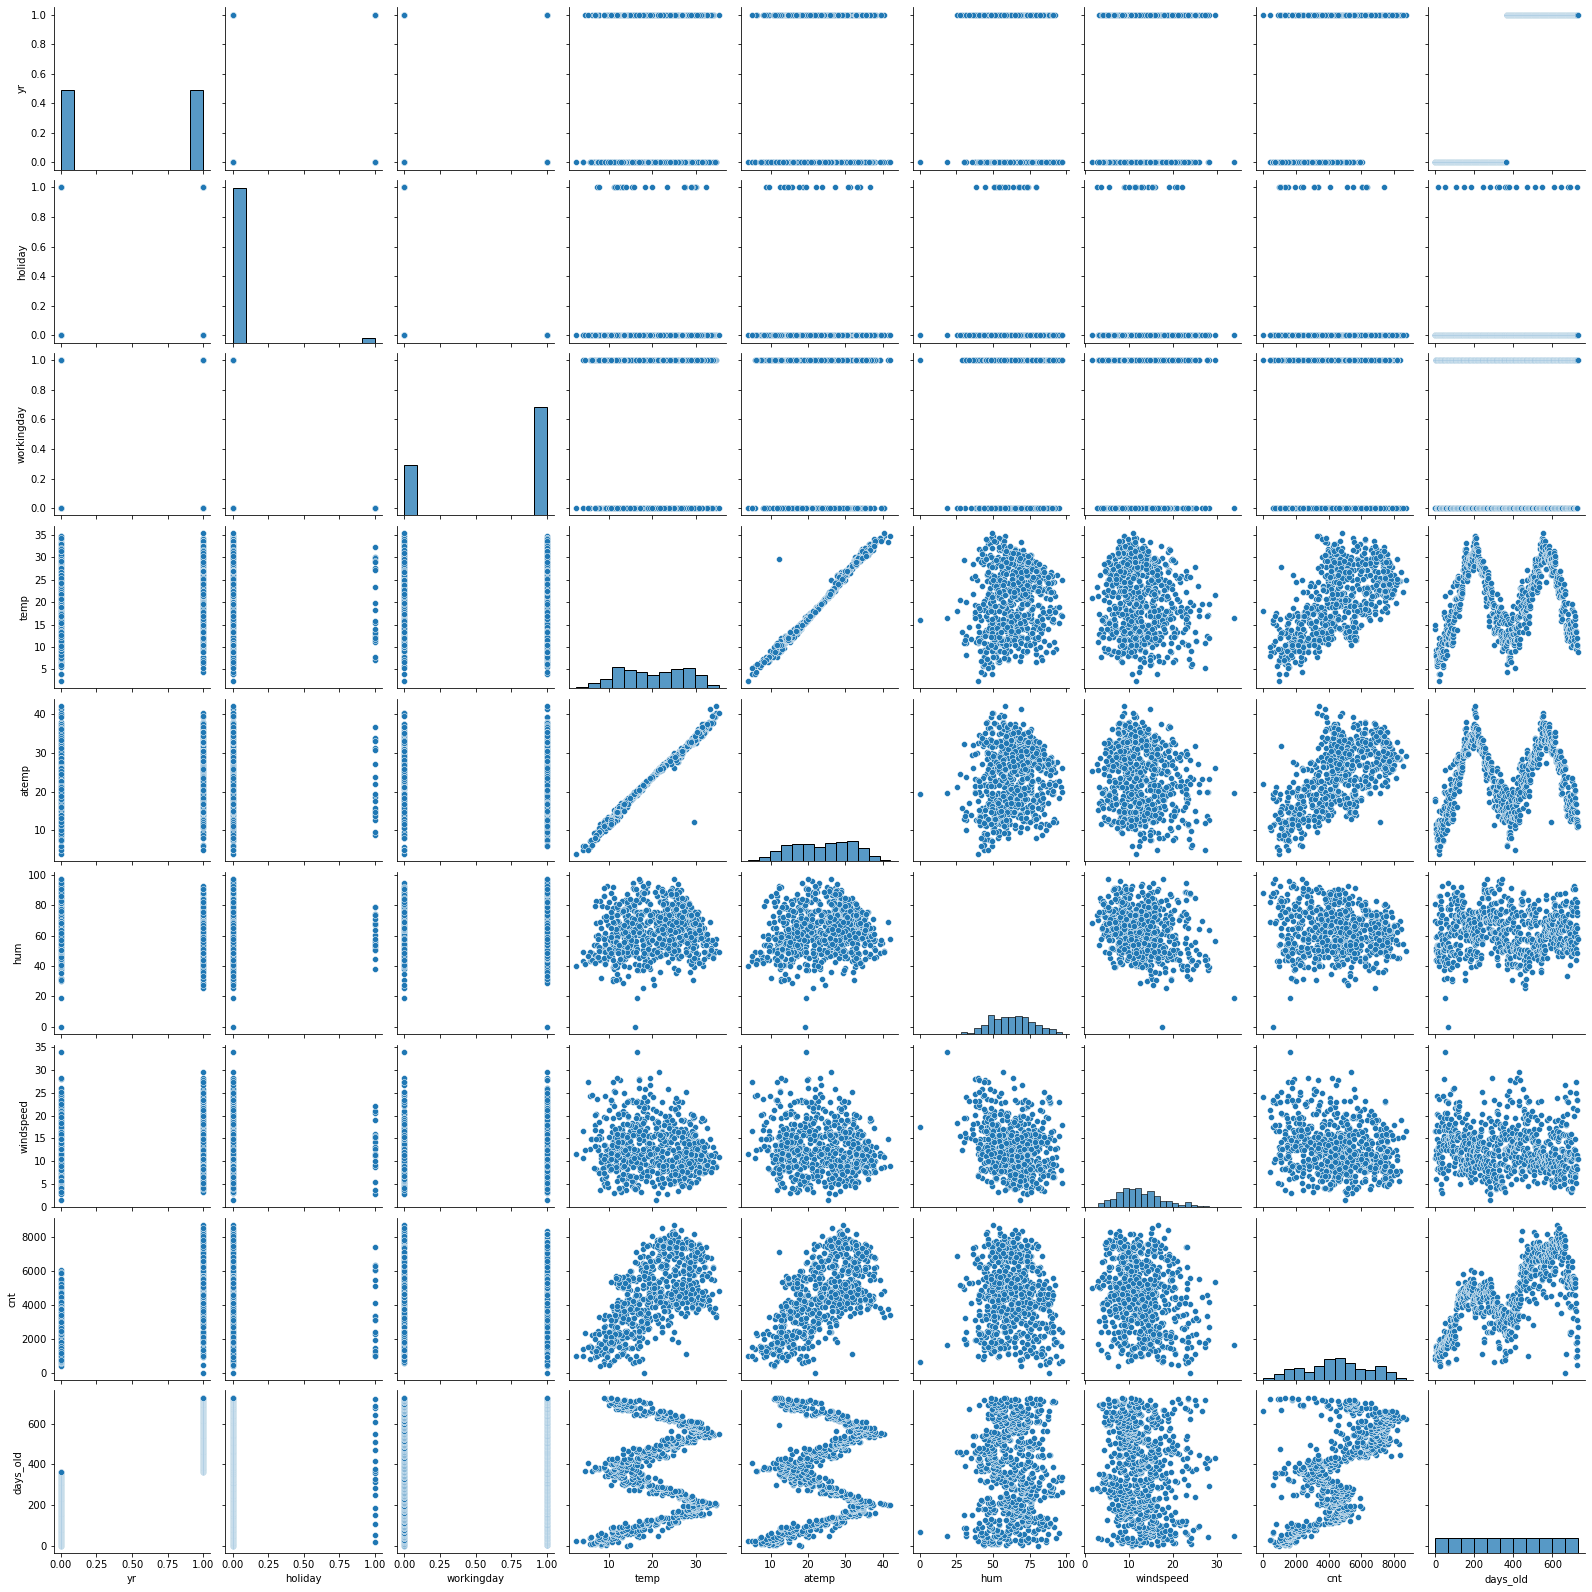

In [17]:
plt.pyplot.figure(figsize=(20,15))
sns.pairplot(bike_file)
plt.pyplot.show()

In [18]:
bike_file.season.value_counts()
#season : season (1:spring, 2:summer, 3:fall, 4:winter) 
## our finding here shows us that there are equal number of days for each season


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

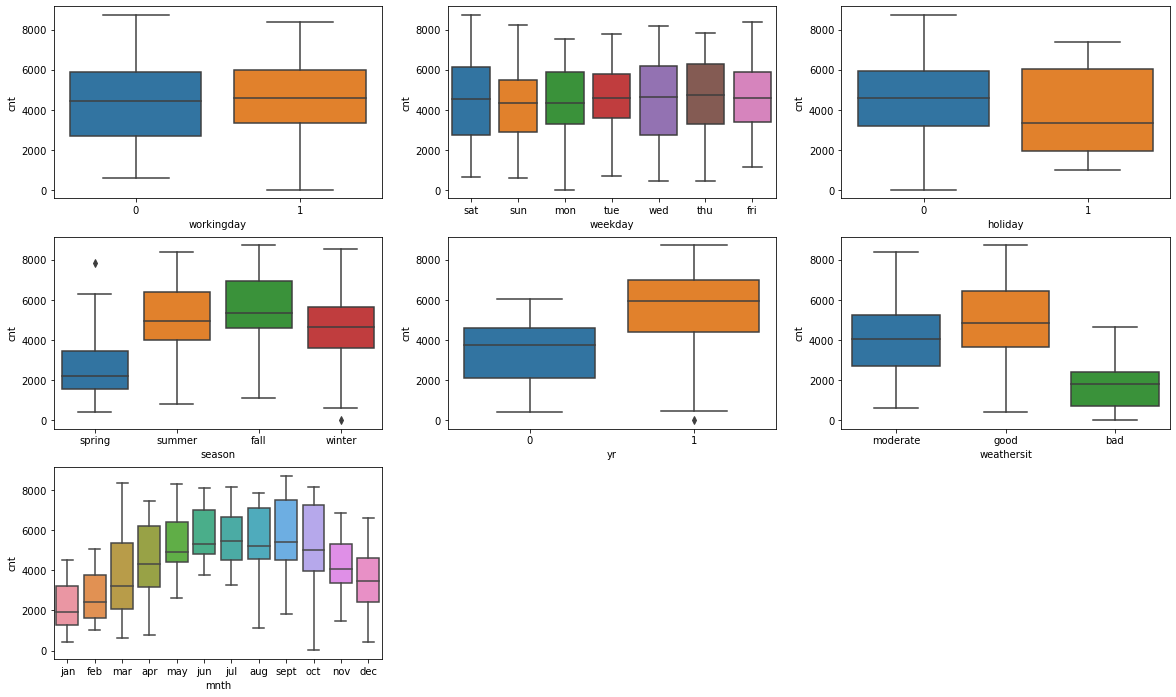

In [19]:
# doing some categorical analysis 

from matplotlib.pyplot import figure

figure(figsize=(20, 12))


plt.pyplot.subplot(3,3,1)
sns.boxplot(data = bike_file, y= "cnt", x="workingday")
plt.pyplot.subplot(3,3,2)
sns.boxplot(data = bike_file, y= "cnt", x="weekday")
plt.pyplot.subplot(3,3,3)
sns.boxplot(data = bike_file, y= "cnt", x="holiday")
plt.pyplot.subplot(3,3,4)
sns.boxplot(data = bike_file, y= "cnt", x="season")
plt.pyplot.subplot(3,3,5)
sns.boxplot(data = bike_file, y= "cnt", x="yr")
plt.pyplot.subplot(3,3,6)
sns.boxplot(data = bike_file, y= "cnt", x="weathersit")
plt.pyplot.subplot(3,3,7)
sns.boxplot(data = bike_file, y= "cnt", x="mnth")
plt.pyplot.subplot(3,3,7)

<AxesSubplot:>

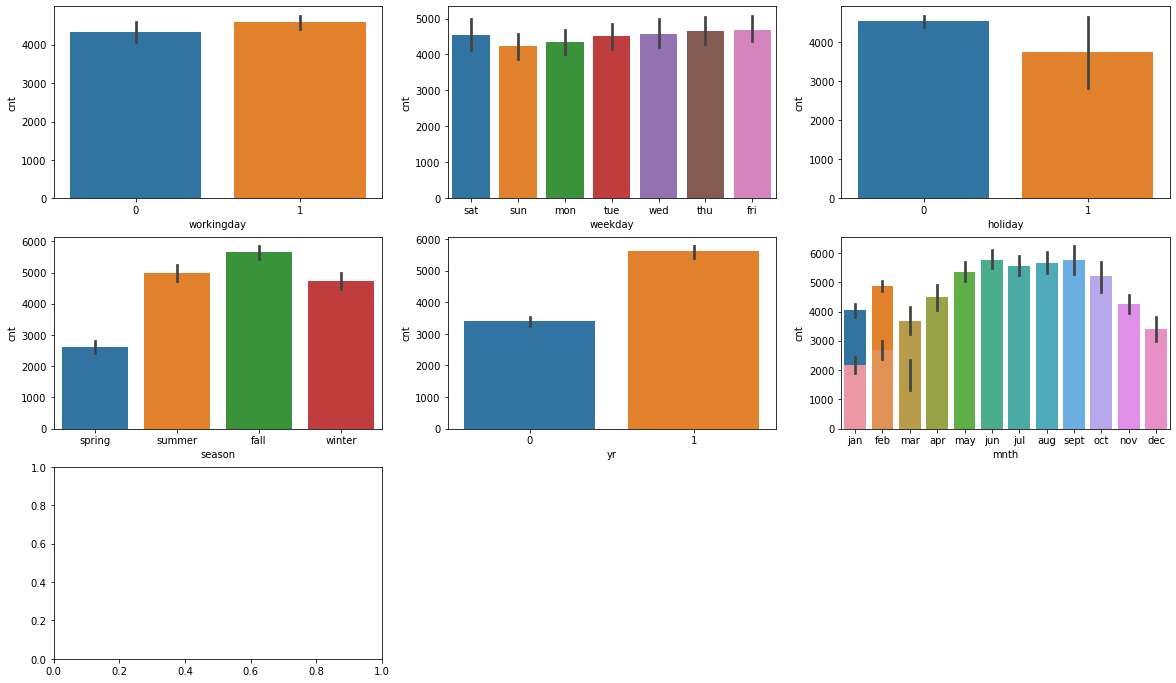

In [20]:
from matplotlib.pyplot import figure

figure(figsize=(20, 12))


plt.pyplot.subplot(3,3,1)
sns.barplot(data = bike_file, y= "cnt", x="workingday")
plt.pyplot.subplot(3,3,2)
sns.barplot(data = bike_file, y= "cnt", x="weekday")
plt.pyplot.subplot(3,3,3)
sns.barplot(data = bike_file, y= "cnt", x="holiday")
plt.pyplot.subplot(3,3,4)
sns.barplot(data = bike_file, y= "cnt", x="season")
plt.pyplot.subplot(3,3,5)
sns.barplot(data = bike_file, y= "cnt", x="yr")
plt.pyplot.subplot(3,3,6)
sns.barplot(data = bike_file, y= "cnt", x="weathersit")
sns.barplot(data = bike_file, y= "cnt", x="mnth")
plt.pyplot.subplot(3,3,7)

  season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
bike_file.weathersit.value_counts(),bike_file.season.value_counts()
# we notice that there is a majority clear weather and fall season 

(good        463
 moderate    246
 bad          21
 Name: weathersit, dtype: int64,
 fall      188
 summer    184
 spring    180
 winter    178
 Name: season, dtype: int64)

we noticed that the correlation between temp and count

<AxesSubplot:xlabel='temp', ylabel='cnt'>

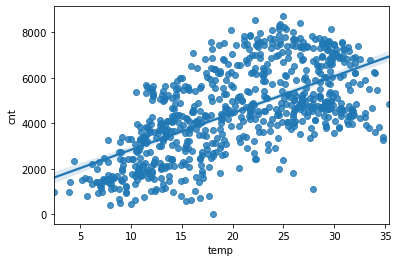

In [22]:
# the most important graph of our model to decide how count is related to temperature 

sns.regplot(data = bike_file, y='cnt', x='temp',label= "count vs temp")

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

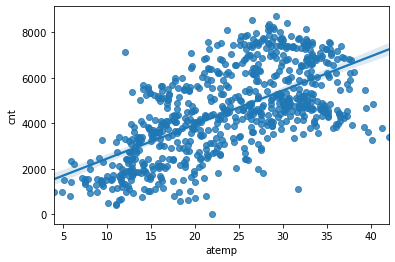

In [23]:
sns.regplot(data = bike_file, y='cnt', x='atemp',)

### it is evident that there is multicolinariaty between these two values and we will deduce this from the VIF values in the later part of this notebook

<AxesSubplot:xlabel='hum', ylabel='cnt'>

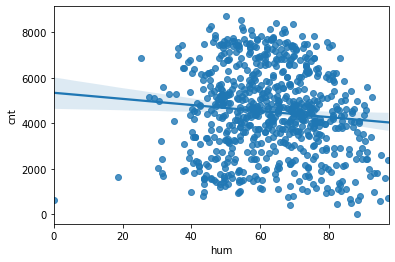

In [24]:
sns.regplot(data = bike_file, y='cnt', x='hum',)
#this is a comprasion between count and Humidity  we can see that there seems to be a relationship between count and humidity 

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

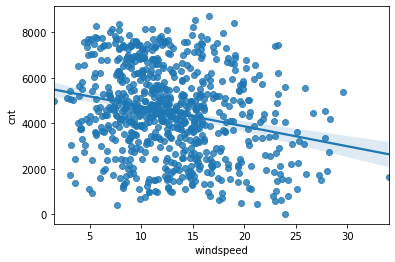

In [25]:
sns.regplot(data = bike_file, y='cnt', x='windspeed',)

#this is a comprasion between count and Humidity  we can see that there seems to be a relationship between count and windspeed 

but the question is which values to take into our model, we will now move forward to slove this problem in the later steps of the the notebook 


In [26]:
# let us now hold the numeric and catogory data in two arrays for making things simple hence forth 
numeric = [ 'temp', 'atemp', 'hum', 'windspeed', 'days_old']
cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']


In [27]:
#Now we will get_dummies to create a dummy variables for categorial data and display the data for the same

bike_file= pd.get_dummies(data=bike_file,columns=["season","mnth","weekday"],drop_first=True)
bike_file = pd.get_dummies(data=bike_file,columns=["weathersit"])
bike_file


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,725,1,...,0,0,0,0,1,0,0,0,0,1
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,726,1,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,727,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,728,1,...,0,0,0,1,0,0,0,0,1,0


In [28]:
# this part of code decides the training data and the train size 
df_train,df_test = sk.train_test_split(bike_file, train_size=0.70, random_state=42)
df_train.shape,df_test.shape

((510, 32), (220, 32))

### now we have the training dataset and the test dataset from the above by using the sk learn method called train_test_split 
### what we understand is the rows in the training set are 510 and in the test we have 220

In [29]:
# code here describes what is going to go into y and X
y_train = df_train.pop('cnt')
X_train = df_train



In [30]:
y_train.head()

645    5478
163    5020
360    1162
640    7572
625    4073
Name: cnt, dtype: int64

In [31]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
645,1,1,0,15.716653,19.38040,70.9583,12.708493,645,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,26.035000,30.08270,49.4583,20.458450,163,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,13.325000,16.38165,76.2500,12.626150,360,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,26.957500,29.95665,79.3750,4.458569,640,0,0,...,0,0,0,0,0,0,1,0,0,1
625,1,0,1,25.556653,28.25335,87.2500,23.958329,625,0,0,...,1,0,0,0,0,1,0,0,0,1


In [32]:
#Feature Scaling continuous variables
scaler = MinMaxScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])

In [33]:
#after transformation X_train is 
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0.857339,0,0,...,1,0,0,0,0,1,0,0,0,1


In [34]:
# checking the data in x train
X_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.551313,0.526919,0.654203,0.415045,0.511576,0.231373,0.258824,...,0.090196,0.149020,0.150980,0.152941,0.145098,0.131373,0.141176,0.029412,0.625490,0.345098
std,0.500106,0.163554,0.471169,0.227237,0.212992,0.143788,0.185760,0.291948,0.422124,0.438419,...,0.286744,0.356457,0.358381,0.360284,0.352545,0.338139,0.348545,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.254115,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.520576,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.769204,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,15)
rfe= rfe.fit(X_train,y_train)

In [36]:
# this part of code is used to find out which variables are used in the RFE model and which are ignored 

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 15),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 10),
 ('mnth_jan', False, 9),
 ('mnth_jul', False, 14),
 ('mnth_jun', False, 8),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 6),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [37]:
# this part of code is used to find out which variables are used in the RFE model and
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [38]:
# this part of code is used to store the columns that are used in the RFE model in an array to make things easy 

rfe_col = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

In [39]:
# we are making a new varibale here to avoid losing the data in X_train variable ( this was learnt via trial and error )
X_train_rfe = X_train[rfe_col]

In [40]:
# adding a constant since the model requires this 
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
# creating an Ordinary least square model and printing the summery 
ls = sm.OLS(y_train,X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.78e-186
Time:                        12:24:07   Log-Likelihood:                -4116.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     494   BIC:                             8332.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2888.1816    343.649     

In [42]:
# finding the VIF values 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(X_train_rfe.values, i)
                          for i in range(X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

           Features     VIF
4             atemp  176.52
3              temp  175.01
0             const   97.36
7          days_old   12.56
1                yr   10.41
9     season_winter    4.05
8     season_spring    3.14
5               hum    1.92
15  weathersit_good    1.65
12         mnth_oct    1.59
6         windspeed    1.29
11         mnth_may    1.21
13        mnth_sept    1.17
14   weathersit_bad    1.16
10         mnth_mar    1.13
2           holiday    1.02


In [43]:
# we can se there is a high correlation between temp and atemp let us drop atemp


rfe_col = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

new_X_train_rfe = X_train_rfe[rfe_col]
new_X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [44]:
# creating a new modle and fitting it 
new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.13e-186
Time:                        12:24:08   Log-Likelihood:                -4116.6
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     495   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2926.2881    341.898     

In [45]:
#checking the VIF once again 
#this time it looks like we fixed it 

vif = pd.DataFrame()
vif['Features'] = new_X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(new_X_train_rfe.values, i)
                          for i in range(new_X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

           Features    VIF
0             const  96.33
6          days_old  12.53
1                yr  10.39
8     season_winter   4.03
7     season_spring   3.12
3              temp   3.11
4               hum   1.90
14  weathersit_good   1.63
11         mnth_oct   1.58
10         mnth_may   1.21
5         windspeed   1.20
12        mnth_sept   1.16
13   weathersit_bad   1.14
9          mnth_mar   1.12
2           holiday   1.02


<AxesSubplot:>

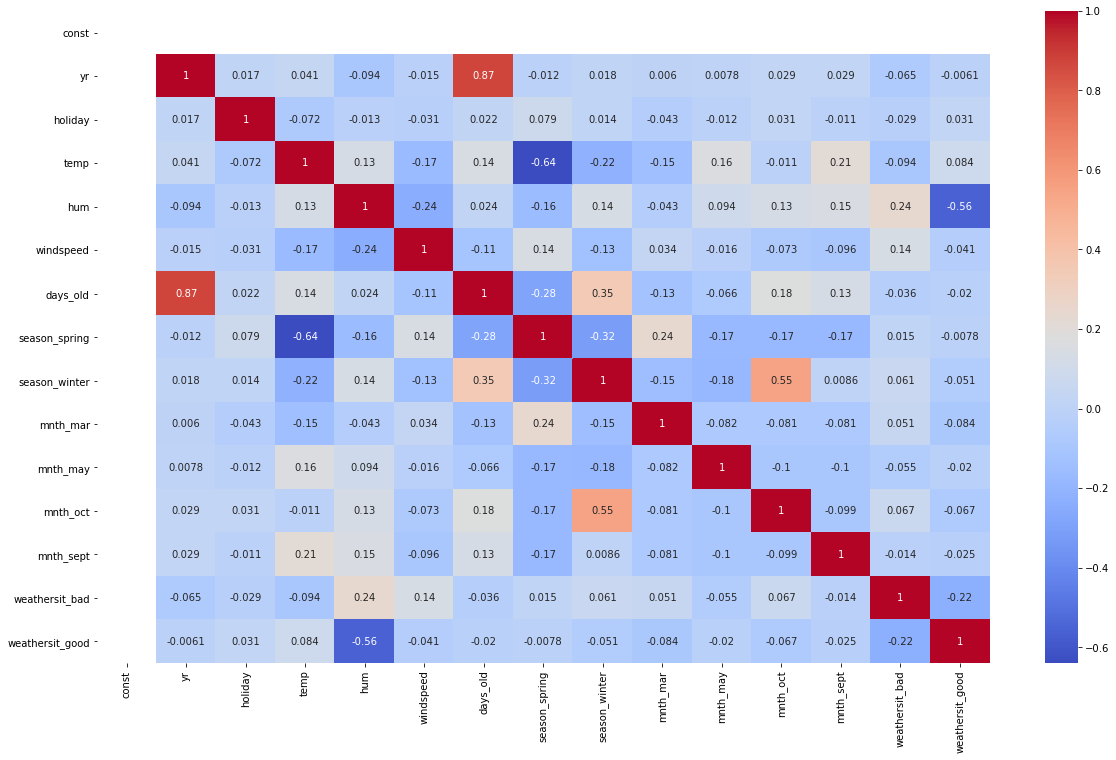

In [46]:
from matplotlib.pyplot import figure

figure(figsize=(20, 12))

sns.heatmap(new_X_train_rfe.corr(), cmap='coolwarm', annot=True)

In [47]:
# Now we search for VIF that are higher because we do not want to have a model that is taking so many predictive variables 
# lets drop days_old


rfe_col = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

new_X_train_rfe = new_X_train_rfe[rfe_col]
new_X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [48]:
# creating a new modle and fitting it 
new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.78e-186
Time:                        12:24:11   Log-Likelihood:                -4119.9
No. Observations:                 510   AIC:                             8268.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2805.4322    340.301     

In [49]:
#checking the VIF once again 
#this time it looks like we fixed it 

vif = pd.DataFrame()
vif['Features'] = new_X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(new_X_train_rfe.values, i)
                          for i in range(new_X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

           Features    VIF
0             const  94.43
6     season_spring   3.01
3              temp   2.96
7     season_winter   2.64
4               hum   1.89
13  weathersit_good   1.63
10         mnth_oct   1.55
5         windspeed   1.20
9          mnth_may   1.17
12   weathersit_bad   1.14
11        mnth_sept   1.13
8          mnth_mar   1.10
1                yr   1.03
2           holiday   1.02


In [50]:
# Now we search for VIF that are higher because we do not want to have a model that is taking so many predictive variables 
# lets drop season_spring


rfe_col = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

new_X_train_rfe = new_X_train_rfe[rfe_col]
new_X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_winter',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [51]:
# creating a new modle and fitting it 
new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          5.43e-172
Time:                        12:24:12   Log-Likelihood:                -4157.0
No. Observations:                 510   AIC:                             8340.
Df Residuals:                     497   BIC:                             8395.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1487.3682    328.508     

In [52]:
#checking the VIF once again 
#this time it looks like we fixed it 

vif = pd.DataFrame()
vif['Features'] = new_X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(new_X_train_rfe.values, i)
                          for i in range(new_X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

           Features    VIF
0             const  76.22
4               hum   1.88
6     season_winter   1.68
12  weathersit_good   1.62
9          mnth_oct   1.51
3              temp   1.29
5         windspeed   1.20
10        mnth_sept   1.13
11   weathersit_bad   1.13
8          mnth_may   1.11
7          mnth_mar   1.09
1                yr   1.03
2           holiday   1.01


In [53]:
# Now we search for VIF that are higher because we do not want to have a model that is taking so many predictive variables 
# lets drop humidity since it has a higher VIF and we know it is realted to weathersit_good


rfe_col = ['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

new_X_train_rfe = new_X_train_rfe[rfe_col]
new_X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [54]:
# creating a new modle and fitting it 
new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.04e-168
Time:                        12:24:12   Log-Likelihood:                -4167.5
No. Observations:                 510   AIC:                             8359.
Df Residuals:                     498   BIC:                             8410.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             206.2031    174.937     

In [55]:
#checking the VIF once again 
#this time it looks like we fixed it 

vif = pd.DataFrame()
vif['Features'] = new_X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(new_X_train_rfe.values, i)
                          for i in range(new_X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

           Features    VIF
0             const  20.78
5     season_winter   1.66
8          mnth_oct   1.50
3              temp   1.26
9         mnth_sept   1.11
4         windspeed   1.09
7          mnth_may   1.09
10   weathersit_bad   1.09
6          mnth_mar   1.08
11  weathersit_good   1.08
1                yr   1.01
2           holiday   1.01


<AxesSubplot:>

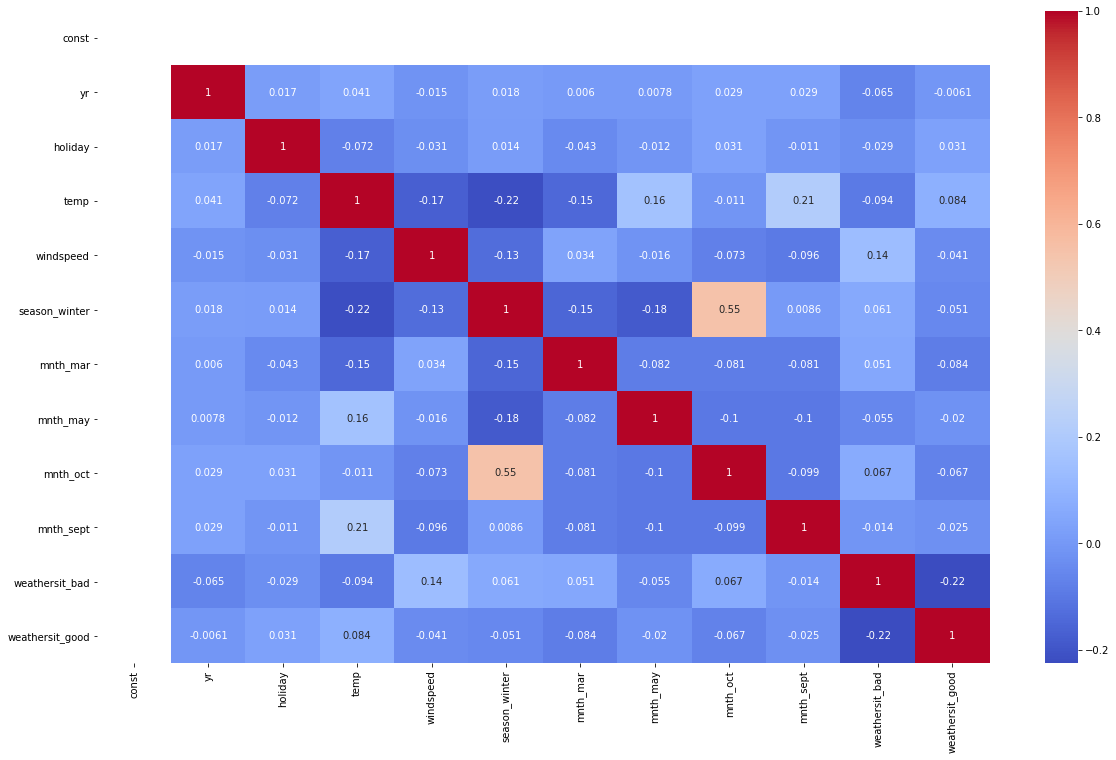

In [56]:
# checking the correlation graph 

from matplotlib.pyplot import figure

figure(figsize=(20, 12))

sns.heatmap(new_X_train_rfe.corr(), cmap='coolwarm', annot=True)

In [57]:
# lets drop mnt_october since it is related to season_winter and season winter holds more significance 




rfe_col = ['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'mnth_mar', 'mnth_may',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

new_X_train_rfe = new_X_train_rfe[rfe_col]
new_X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'mnth_mar',
       'mnth_may', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [58]:
# creating a new modle and fitting it 
new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     201.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.46e-168
Time:                        12:24:15   Log-Likelihood:                -4171.8
No. Observations:                 510   AIC:                             8366.
Df Residuals:                     499   BIC:                             8412.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             158.3843    175.439     

In [59]:
#checking the VIF once again 
#this time it looks like we fixed it 

vif = pd.DataFrame()
vif['Features'] = new_X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(new_X_train_rfe.values, i)
                          for i in range(new_X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

           Features    VIF
0             const  20.60
3              temp   1.22
5     season_winter   1.17
4         windspeed   1.09
7          mnth_may   1.09
9    weathersit_bad   1.09
6          mnth_mar   1.08
8         mnth_sept   1.08
10  weathersit_good   1.07
1                yr   1.01
2           holiday   1.01


<AxesSubplot:>

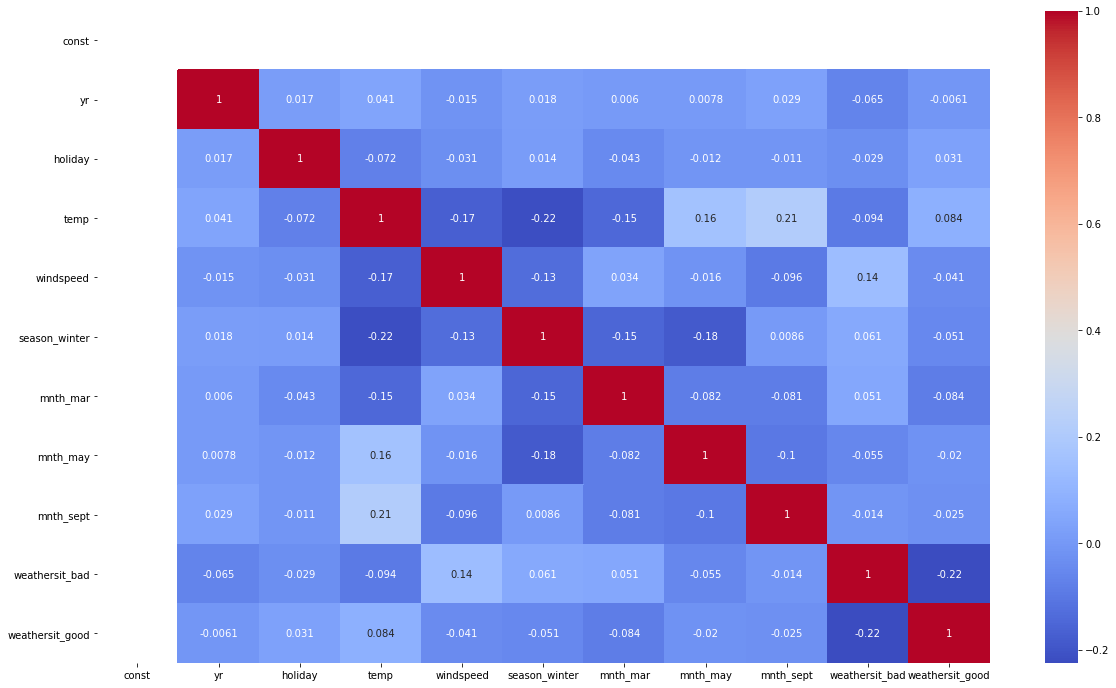

In [60]:
# checking the correlation graph 

from matplotlib.pyplot import figure

figure(figsize=(20, 12))

sns.heatmap(new_X_train_rfe.corr(), cmap='coolwarm', annot=True)

In [61]:
# lets drop windspeed since it is related to temp and temp holds more significance





rfe_col = ['yr', 'holiday', 'temp', 'season_winter', 'mnth_mar', 'mnth_may',
       'mnth_sept', 'weathersit_bad', 'weathersit_good']

new_X_train_rfe = new_X_train_rfe[rfe_col]
new_X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'season_winter', 'mnth_mar', 'mnth_may',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [62]:
# creating a new modle and fitting it 

new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.63e-168
Time:                        12:24:18   Log-Likelihood:                -4175.3
No. Observations:                 510   AIC:                             8371.
Df Residuals:                     500   BIC:                             8413.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -141.5599    133.586     

In [63]:
#checking the VIF once again 
#this time it looks like we fixed it 
new_X_train_rfe = new_X_train_rfe.drop(['const'],axis = 1)
vif = pd.DataFrame()
vif['Features'] = new_X_train_rfe.columns
vif['VIF']  = [variance_inflation_factor(new_X_train_rfe.values, i)
                          for i in range(new_X_train_rfe.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending = False)
print(vif)

          Features   VIF
2             temp  3.52
8  weathersit_good  2.44
0               yr  1.94
3    season_winter  1.28
5         mnth_may  1.19
6        mnth_sept  1.18
4         mnth_mar  1.07
7   weathersit_bad  1.06
1          holiday  1.03


The model looks like it is in permisible limits for P values and VIF values



In [64]:
ls_model.params

const              -141.559860
yr                 1963.721014
holiday            -733.958256
temp               5226.419951
season_winter      1177.664827
mnth_mar            476.054416
mnth_may            631.773577
mnth_sept           695.586595
weathersit_bad    -1579.615781
weathersit_good     661.110959
dtype: float64

In [65]:
#Build a model with above columns
lm = LinearRegression()
lm.fit(new_X_train_rfe, y_train)
lm.intercept_,lm.coef_

(-141.55985958839756,
 array([ 1963.72101351,  -733.95825611,  5226.41995087,  1177.66482708,
          476.05441599,   631.77357676,   695.58659481, -1579.61578148,
          661.11095852]))

In [66]:
#Residucal Analysis
 
y_train_pred = lm.predict(X_train[rfe_col])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

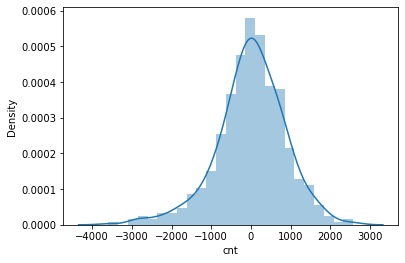

In [67]:
# plotting an histogram 
 
    
sns.distplot(y_train-y_train_pred)

## Errors are normally distribured here with mean 0. So everything seems to be fine



In [68]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7987479140295531

## R2 Same as we obtained for our final model


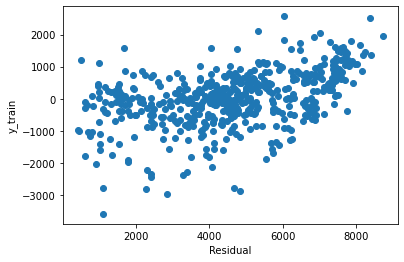

In [69]:
# Linearity Check

# scatter plot for the check
residual = (y_train - y_train_pred)
plt.pyplot.scatter(y_train,residual)
plt.pyplot.ylabel("y_train")
plt.pyplot.xlabel("Residual")
plt.pyplot.show()

## Predict values for test data set


In [70]:
y_test = df_test.pop('cnt')
X_test = df_test


In [71]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [72]:
y_test_pred = lm.predict(X_test[rfe_col])


In [73]:
r2_score(y_test,y_test_pred)

0.7909321666618335

### R2 value for predictions on test data (0.7987479140295531) is almost same as R2 value of train data(0.7909321666618335). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

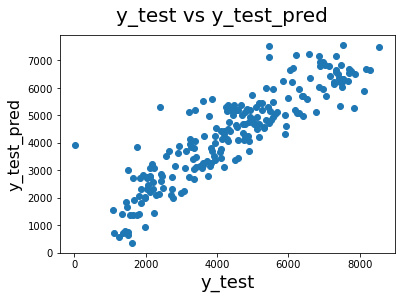

In [74]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.pyplot.figure()
plt.pyplot.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.pyplot.xlabel('y_test', fontsize = 18)                          # X-label
plt.pyplot.ylabel('y_test_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.



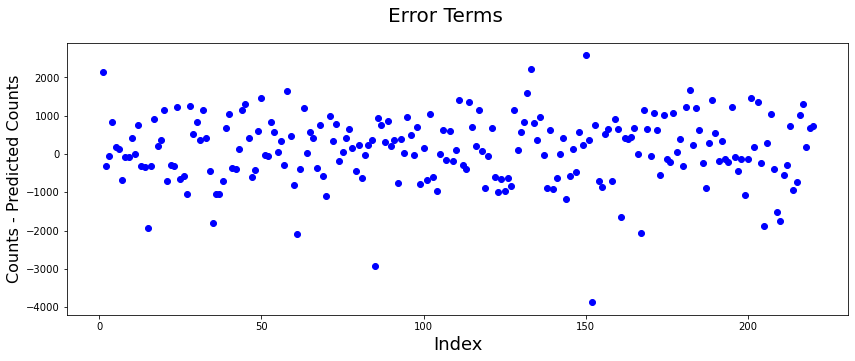

In [75]:
### checking if the error terms are scattered hetrogenously for test data 

def plot_err_terms(act,pred):
    c = [i for i in range(1,221,1)]
    fig = plt.pyplot.figure(figsize=(14,5))
    plt.pyplot.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.pyplot.xlabel('Index', fontsize=18)                      # X-label
    plt.pyplot.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
    
plot_err_terms(y_test,y_test_pred)
 

In [76]:
### The error terms in the test data are randomly scattered and have not formed a pattern 


In [77]:
# Printing the final OSL Result 

In [78]:
new_X_train_rfe = sm.add_constant(new_X_train_rfe)
ls = sm.OLS(y_train,new_X_train_rfe)
ls_model = ls.fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.63e-168
Time:                        12:24:21   Log-Likelihood:                -4175.3
No. Observations:                 510   AIC:                             8371.
Df Residuals:                     500   BIC:                             8413.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -141.5599    133.586     